In [155]:
import numpy as np
import cv2

matriz = np.asmatrix(
    [
    [45,60,98,127,132,133,137,133],
    [46,65,98,123,126,128,131,133],
    [47,65,96,115,119,123,135,137],
    [47,63,91,107,113,122,138,134],
    [50,59,80,97,110,123,133,134],
    [49,53,68,83,97,113,128,133],
    [50,50,58,70,84,102,116,126],
    [50,50,52,58,69,86,101,120]
    ]
)

kernel = np.asmatrix([[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]])

In [79]:
matriz_pad = np.pad(array=matriz, pad_width=1, mode="constant", constant_values=0)
matriz_pad

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  45,  60,  98, 127, 132, 133, 137, 133,   0],
       [  0,  46,  65,  98, 123, 126, 128, 131, 133,   0],
       [  0,  47,  65,  96, 115, 119, 123, 135, 137,   0],
       [  0,  47,  63,  91, 107, 113, 122, 138, 134,   0],
       [  0,  50,  59,  80,  97, 110, 123, 133, 134,   0],
       [  0,  49,  53,  68,  83,  97, 113, 128, 133,   0],
       [  0,  50,  50,  58,  70,  84, 102, 116, 126,   0],
       [  0,  50,  50,  52,  58,  69,  86, 101, 120,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [154]:
kernel

matrix([[-0.125,  0.   ,  0.125],
        [-0.25 ,  0.   ,  0.25 ],
        [-0.125,  0.   ,  0.125]])

In [62]:
h, w = matriz_pad.shape
matriz_filtrada = np.zeros(shape=(h-2,w-2))
for y in range(1, h-1):
    for x in range(1, w-1):
        print(matriz_pad[y-1:y+2, x-1:x+2])
        matriz_filtrada[y-1,x-1] = np.round(np.sum(np.multiply(matriz_pad[y-1:y+2, x-1:x+2], kernel)))

[[ 0  0  0]
 [ 0 45 60]
 [ 0 46 65]]
[[ 0  0  0]
 [45 60 98]
 [46 65 98]]
[[  0   0   0]
 [ 60  98 127]
 [ 65  98 123]]
[[  0   0   0]
 [ 98 127 132]
 [ 98 123 126]]
[[  0   0   0]
 [127 132 133]
 [123 126 128]]
[[  0   0   0]
 [132 133 137]
 [126 128 131]]
[[  0   0   0]
 [133 137 133]
 [128 131 133]]
[[  0   0   0]
 [137 133   0]
 [131 133   0]]
[[ 0 45 60]
 [ 0 46 65]
 [ 0 47 65]]
[[45 60 98]
 [46 65 98]
 [47 65 96]]
[[ 60  98 127]
 [ 65  98 123]
 [ 65  96 115]]
[[ 98 127 132]
 [ 98 123 126]
 [ 96 115 119]]
[[127 132 133]
 [123 126 128]
 [115 119 123]]
[[132 133 137]
 [126 128 131]
 [119 123 135]]
[[133 137 133]
 [128 131 133]
 [123 135 137]]
[[137 133   0]
 [131 133   0]
 [135 137   0]]
[[ 0 46 65]
 [ 0 47 65]
 [ 0 47 63]]
[[46 65 98]
 [47 65 96]
 [47 63 91]]
[[ 65  98 123]
 [ 65  96 115]
 [ 63  91 107]]
[[ 98 123 126]
 [ 96 115 119]
 [ 91 107 113]]
[[123 126 128]
 [115 119 123]
 [107 113 122]]
[[126 128 131]
 [119 123 135]
 [113 122 138]]
[[128 131 133]
 [123 135 137]
 [122 138 13

In [63]:
matriz_filtrada

array([[ 26.,  47.,  67.,  83.,  90.,  92.,  93.,  67.],
       [ 37.,  68.,  94., 116., 125., 129., 132.,  94.],
       [ 38.,  68.,  92., 110., 120., 126., 132.,  95.],
       [ 38.,  66.,  86., 104., 114., 124., 132.,  94.],
       [ 37.,  62.,  78.,  94., 108., 120., 129.,  93.],
       [ 36.,  57.,  69.,  83.,  98., 112., 124.,  90.],
       [ 35.,  53.,  60.,  71.,  85., 100., 114.,  85.],
       [ 25.,  36.,  39.,  45.,  54.,  64.,  75.,  58.]])

In [ ]:
def filtro_lineal(imagen, kernel, pad_val = 0):
    h, w = imagen.shape
    h_k, w_k = kernel.shape
    pad_n = int((h_k - 1) / 2)
    matriz_filtrada = np.zeros(shape=(h,w))
    matriz_pad = np.pad(array=imagen, pad_width=pad_n, mode="constant", constant_values=pad_val)
    for y in range(0, h):
        for x in range(0, w):
            m = matriz_pad[y:y+h_k, x:x+w_k]
            matriz_filtrada[y,x] = np.clip(np.sum(np.multiply(m, kernel)), 0, 255)
    return matriz_filtrada.astype(np.uint8)
    

In [125]:
kernel_sobel = (1/8) * np.asmatrix([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ], dtype=np.float32)

kernel_bilineal = (1/16) * np.asmatrix([
    [1,2,1],
    [2,4,2],
    [1,2,1]
    ], dtype=np.float32)


K = 3
kernel_box = (1/(K**2))*np.ones(shape=(K,K))

kernel_gaussian = (1/256) * np.asmatrix([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
    ],dtype=np.float32)

kernel_corner = (1/4) * np.asmatrix([
    [1,-2,1],
    [-2,4,-2],
    [1,-2,1]
    ], dtype=np.float32)

In [183]:
imagen = cv2.imread("img/lena.jpeg", cv2.IMREAD_GRAYSCALE)
imagen_proc = filtro_lineal(imagen, kernel_sobel, 0)
cv2.imshow("Imagen Filtrada",  2*imagen_proc.astype(np.int8))
cv2.waitKey(0)

-1

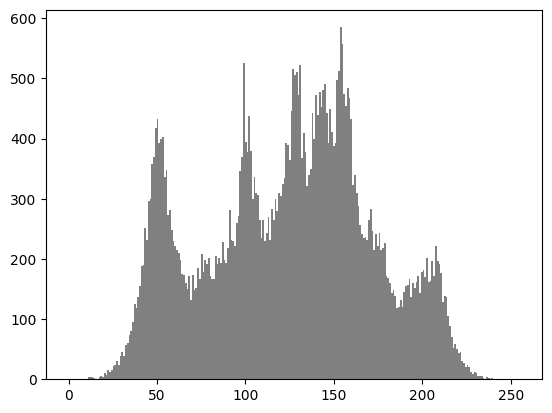

In [179]:
import matplotlib.pyplot as plt
imagen_proc
plt.hist(imagen.flatten(), bins=256, range=(0,255), color="gray")
plt.show()